# Лабораторная по pandas, numpy, scipy.stats, matplotlib, seaborn


### Дедлайн: 22 декабря 23:59

Работа принимается один раз, как только вы отправили ее своему семинаристу по любому канаду связи.

Плагиат будет караться полной отменой баллов за лабораторную. 


 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)
 - [Официальная документация scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

# Часть 1 `Numpy`, `Matplotlib`, `scipy.stats`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

%matplotlib inline

## 1. Данные

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1 (3 балла)
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [2]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
coin = sps.bernoulli(p=0.5).rvs

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [3]:
coin(size=10)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

**Решение**

In [4]:
def uniform(size, precision):
    size_tuple = size if isinstance(size, tuple) else (size,)
    coin_flips = coin(size_tuple + (precision,)).astype(float)

    binary_values = 2.0 ** np.arange(0, precision)
    uniform_samples = np.dot(coin_flips, binary_values)

    uniform_samples /= 2 ** precision

    return uniform_samples

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

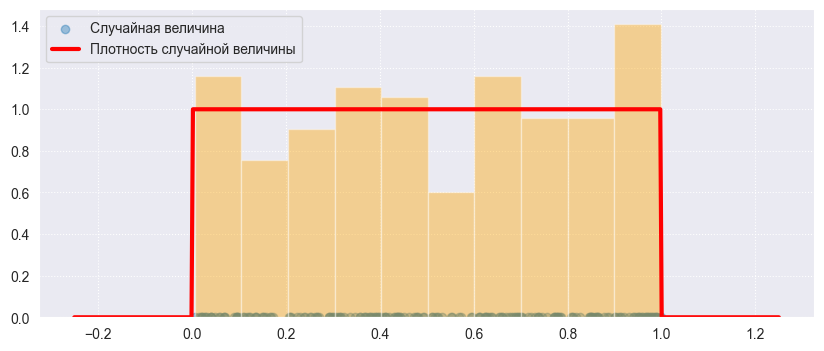

In [5]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision=50)

# Отрисовка графика
plt.figure(figsize=(10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample,
    np.zeros(size),
    alpha=0.4,
    label="Случайная величина"
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample,
    bins=10,
    density=True,
    alpha=0.4,
    color="orange"
)

# рисуем график плотности
plt.plot(
    grid,
    sps.uniform.pdf(grid),
    color='red',
    linewidth=3,
    label="Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

## Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

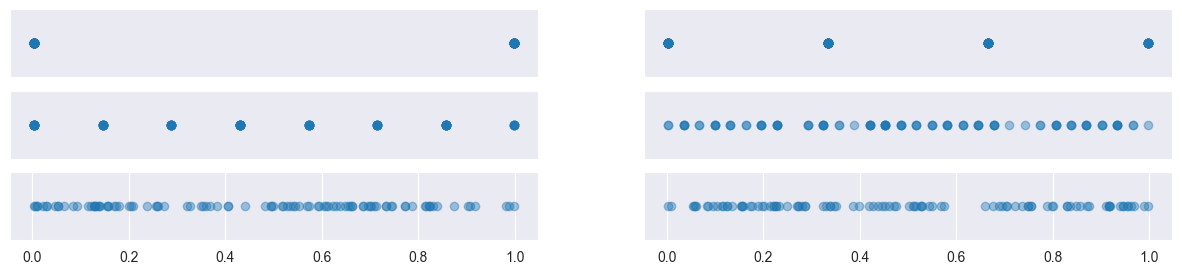

In [6]:
size = 100

plt.figure(figsize=(15, 3))

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size, precision),
        np.zeros(size),
        alpha=0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**

При увеличении значения `precision` растет разнообразие всевозможных значений, которые может принимать случайная величина, а как следствие увеличивается и "равномерность" плотности распределения случайной величины, т.е. случайная величина приближается к $U[0, 1]$.

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [7]:
def normal(size=1, loc=0, scale=1, precision=30):
    u1 = uniform(size, precision)
    u2 = uniform(size, precision)

    x = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)

    result = loc + scale * x

    return result.reshape(size)


normal(size=20)

array([ 0.42508617,  0.59933475,  1.31353828, -0.17017127,  0.18099979,
       -0.81598727,  1.17432858, -0.75430085, -1.48334028, -0.7403921 ,
       -1.02020658, -0.7877635 , -0.0841317 ,  1.00154885,  1.11604215,
        0.45346491, -0.25907471, -1.12227345, -0.17678908, -1.52150736])

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

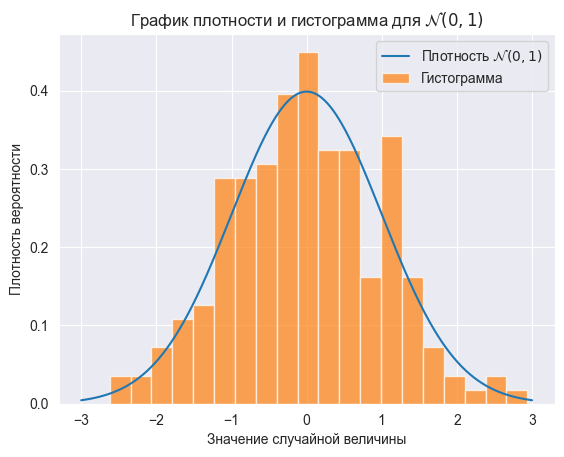

In [8]:
random_variables = normal(200)

x = np.linspace(-3, 3, 1000)
pdf_values = sps.norm.pdf(x)
plt.plot(x, pdf_values, label='Плотность $\mathcal{N}(0, 1)$')

plt.hist(random_variables, bins=20, density=True, alpha=0.7, label='Гистограмма')

plt.title('График плотности и гистограмма для $\mathcal{N}(0, 1)$')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()


Решение основывается на **методе обратного преобразования**

Поскольку ф-ия экспоненциального распределения $F(x) = (1 - e^{-\lambda x}) \cdot I(x > 0)$ является строго монотонной и непрерывной на $R$, то у неё есть обратная ф-ия $F^{-1}: [0, 1] \rightarrow R$. 
Таким образом, если $U_1, \ldots, U_n$ - выборка из равномерного распределения, то $X_1, \ldots, X_n,$ где $X_i = F^{-1}(U_i),$ - выборка из экспоненциального распределения

$F^{-1}(x) = -\dfrac{1}{\lambda}{ }\ln(1 - x)$

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [9]:
def expon(size=1, lambd=1, precision=30):
    u = uniform(size, precision)
    x = - (1 / lambd) * np.log(1 - u)

    return x


expon(10)

array([0.05678632, 1.86531003, 0.02896868, 0.56132453, 3.7343469 ,
       0.43779277, 0.01063198, 1.51864592, 0.42629691, 1.03815133])

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

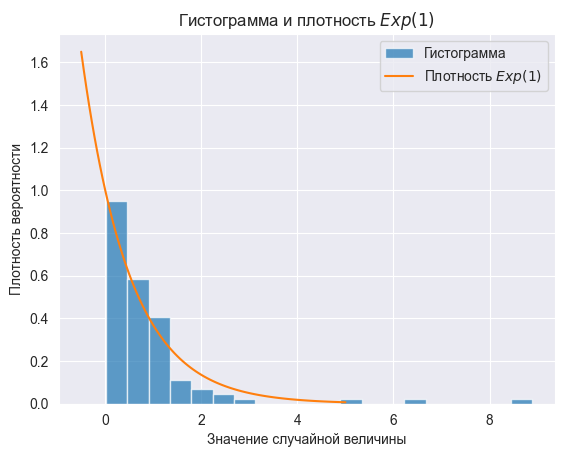

In [10]:
exponential_samples = expon(100, 1)

plt.hist(exponential_samples, bins=20, density=True, alpha=0.7, label='Гистограмма')

x = np.linspace(-0.5, 5, 100)
pdf_values = np.exp(-x)
plt.plot(x, pdf_values, label='Плотность $Exp(1)$')

plt.title('Гистограмма и плотность $Exp(1)$')
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()


**Вывод по задаче:**

Из графиков видно, что гистограммы выборки соответствует теоретической плотности экспоненциального и нормального распределений, сгенерированных методами обратного преобразования и преобразования Бокса-Мюллера соответственно. Это подтверждает корректность использованных методов генерации случайных величин.

### Задача 2  (3 балла)
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

In [11]:
def matrix_multiplication(A, B):
    return np.sum(A[:, :, None] * B[None, :, :], axis=1)

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [12]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
C = np.array([[1, 2],
              [3, 4]])
D = np.array([[5, 6],
              [7, 8]])
np.abs(matrix_multiplication(A, B) - A @ B).sum()

9.681144774731365e-14

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [13]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [14]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B)

print(10)

CPU times: user 110 ms, sys: 18.8 ms, total: 129 ms
Wall time: 45 ms
CPU times: user 82.9 ms, sys: 1.8 ms, total: 84.7 ms
Wall time: 13.9 ms
CPU times: user 11.8 ms, sys: 366 µs, total: 12.2 ms
Wall time: 1.66 ms
CPU times: user 6.5 s, sys: 1.77 s, total: 8.27 s
Wall time: 6.35 s
CPU times: user 4.17 ms, sys: 300 µs, total: 4.47 ms
Wall time: 4.42 ms
10


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [15]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''

    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)

    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))

    C = np.sum(A[:, :, None] * B[None, :, :], axis=1)

    return C

### Задача 3  (4 балла)

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [16]:
def brownian_motion(sigma, t, num_intervals, dimension, num_particles):
    delta = t / num_intervals

    increment = sps.norm(scale=np.sqrt(delta)).rvs((num_particles, num_intervals, dimension))

    trajectories = np.cumsum(increment, axis=1)

    result = sigma * trajectories

    return result


brownian_motion(1, 10, 1, 5, 2)

array([[[ 0.09065355,  3.48853098, -0.20767838, -4.79090296,
         -2.55868186]],

       [[ 0.83071422,  0.42115369,  3.20570265, -5.66300617,
          2.96918059]]])

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

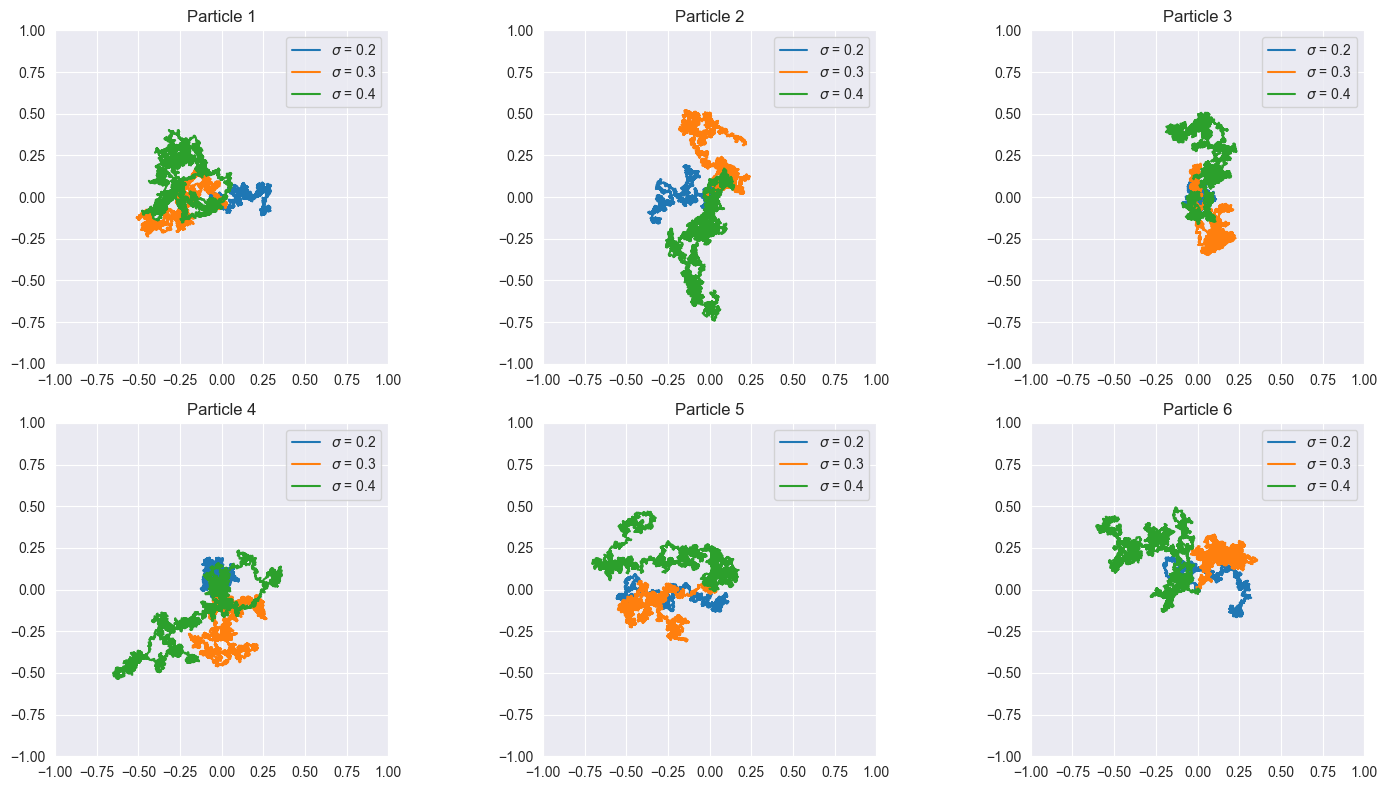

In [17]:
sigmas = [0.2, 0.3, 0.4]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for j in range(6):
    for i, sigma in enumerate(sigmas):
        trajectories = brownian_motion(sigma, 1, 10_000, 2, 1)
        axes[j // 3, j % 3].plot(
            trajectories[0, :, 0],
            trajectories[0, :, 1],
            label=f'$\sigma$ = {sigma}'
        )

    axes[j // 3, j % 3].set_title(f'Particle {j + 1}')
    axes[j // 3, j % 3].set_aspect('equal')
    axes[j // 3, j % 3].legend()

for ax in axes.flatten():
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

plt.tight_layout()
plt.show()


Как вид траектории зависит от $\sigma$?

Значение параметра $\sigma$ влияет на хаотичность броуновского движения. Чем больше $\sigma$, тем более "разбросанными" будут траектории, и наоборот, меньшие значения $\sigma$ приведут к более устойчивым и менее изменчивым траекториям, сужая разброс координат частицы.

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

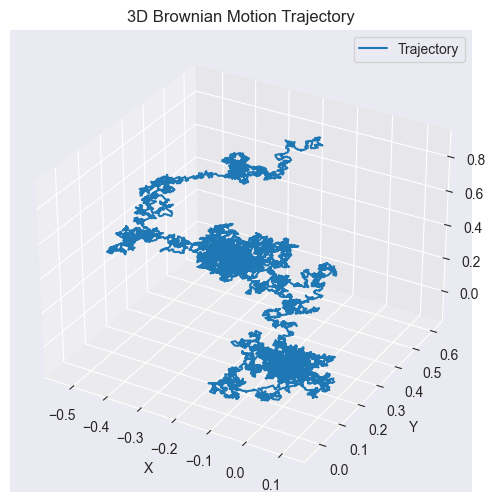

In [18]:
sigma = 0.5

trajectory = brownian_motion(sigma, 1, 10_000, 3, 1)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(trajectory[0, :, 0], trajectory[0, :, 1], trajectory[0, :, 2], label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Brownian Motion Trajectory')
ax.legend()

plt.show()


**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно должны присутствовать текстовые пояснения и графики. Сделайте выводы.

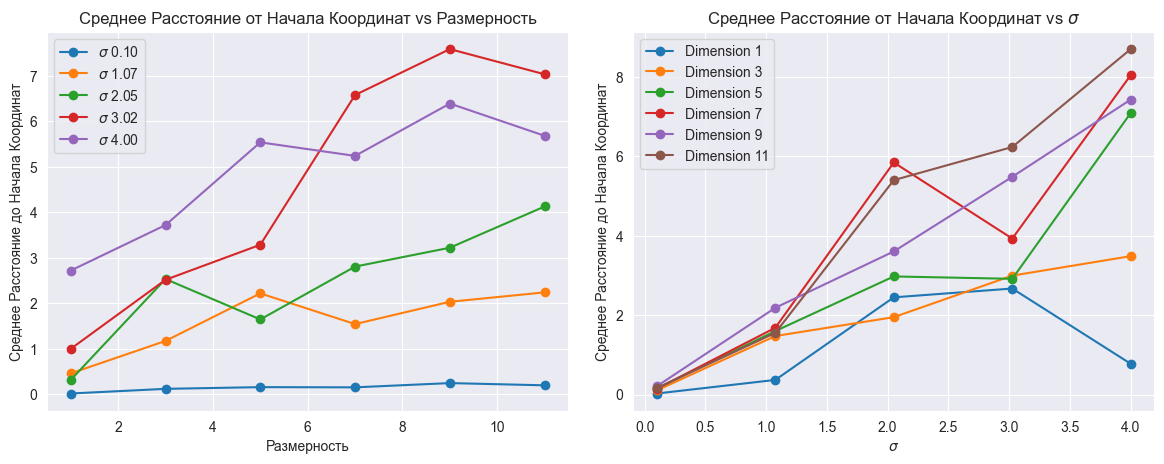

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def mean_distance_to_origin(trajectories):
    # Вычисление среднего расстояния от начала координат
    distances = np.linalg.norm(trajectories, axis=-1)
    return np.mean(distances, axis=0)


# Параметры исследования
T = 1
num_intervals = 10000
num_particles = 100
dimensions = [x for x in range(1, 13, 2)]
sigmas = np.linspace(0.1, 4.0, 5)

# Создание сетки графиков
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for sigma in sigmas:
    mean_distances_dimension = []

    for i, dimension in enumerate(dimensions):
        trajectories = brownian_motion(sigma, T, num_intervals, dimension, num_particles)
        mean_distances_dimension.append(np.mean(mean_distance_to_origin(trajectories[-1])))

    ax[0].plot(dimensions, mean_distances_dimension, label=f'$\sigma$ {sigma:.2f}', marker='o')

# График зависимости среднего расстояния от параметра sigma
for i, dimension in enumerate(dimensions):
    mean_distances_sigma = []

    for sigma in sigmas:
        trajectories = brownian_motion(sigma, T, num_intervals, dimension, num_particles)
        mean_distances_sigma.append(np.mean(mean_distance_to_origin(trajectories[-1])))

    ax[1].plot(sigmas, mean_distances_sigma, label=f'Dimension {dimension}', marker='o')

# Настройка графика
ax[0].set_title('Среднее Расстояние от Начала Координат vs Размерность')
ax[0].set_xlabel('Размерность')
ax[0].set_ylabel('Среднее Расстояние до Начала Координат')
ax[0].legend()

ax[1].set_title('Среднее Расстояние от Начала Координат vs $\sigma$')
ax[1].set_xlabel('$\sigma$')
ax[1].set_ylabel('Среднее Расстояние до Начала Координат')
ax[1].legend()

plt.tight_layout(pad=2)
plt.show()


__Вывод:__ Увеличение размерности или параметра $\sigma$ приводит к увеличению среднего расстояния до начала координат.

1. **Увеличение размерности:**
   Пусть $X_1, X_2, \ldots, X_n$ - независимые случайные величины, представляющие соответствующие координаты вектора в $n$-мерном пространстве. Расстояние от начала координат до конечной точки вектора задается как $D = \sqrt{X_1^2 + X_2^2 + \ldots + X_n^2}$. По закону больших чисел, при увеличении размерности вектора, среднеквадратичная сумма $X_1^2 + X_2^2 + \ldots + X_n^2$ увеличивается, что и приводит к увеличению среднего расстояния до начала координат.

2. **Увеличение параметра $\sigma$:**
   Параметр $\sigma$ влияет на разброс случайных блужданий. Чем больше $\sigma$, тем больше случайный вектор может отклоняться от начальной точки. Увеличение параметра $\sigma$ увеличивает среднее расстояние от начала координат, так как увеличивается дисперсия отклонения.

### Задача 4  (4 баллов)

В этой задаче вам нужно исследовать свойства дискретных распределений и абсолютно непрерывных распределений.

Для перечисленных ниже распределений нужно  
1. На основе графиков дискретной плотности (функции массы) для различных параметров пояснить, за что отвечает каждый параметр.  
2. Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.  
3. Сделать выводы о свойтсвах параметров каждого из распределений.

Распределения:
* Бернулли 
* Биномиальное
* Дискретное равномерное
* Геометрическое

Для выполнения данного задания можно использовать код с лекции. Можно использовать функции из `scipy`. Сделать виджеты недостаточно, поскольку они не сохраняются.

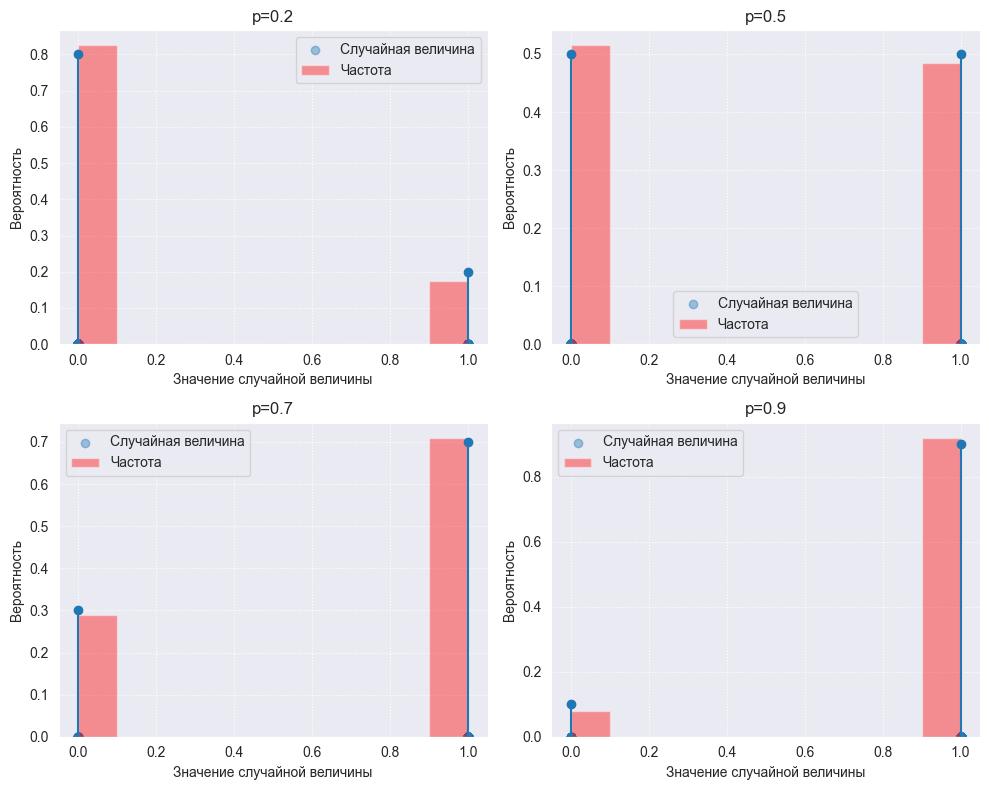

In [20]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

p_values = [0.2, 0.5, 0.7, 0.9]

for i, p in enumerate(p_values):
    sample = sps.bernoulli.rvs(size=size, p=p)

    # Вычисляем индексы для сетки 2x2
    row = i // 2
    col = i % 2

    # Отображаем значения случайных величин
    ax[row, col].scatter(
        sample,
        np.zeros(size),
        alpha=0.4,
        label="Случайная величина"
    )

    # Строим дискретную плотность (функцию массы)
    x = [0, 1]
    y = sps.bernoulli.pmf(x, p)
    ax[row, col].stem(x, y, linefmt='-', markerfmt='o', basefmt=" ")

    # По точкам строим нормированную полупрозрачную гистограмму
    ax[row, col].hist(
        sample,
        bins=10,
        alpha=0.4,
        color="red",
        label="Частота",
        weights=np.ones_like(sample) / len(sample)
    )

    ax[row, col].legend()
    ax[row, col].grid(ls=':')
    ax[row, col].set_title(f'p={p}')
    ax[row, col].set_xlabel('Значение случайной величины')
    ax[row, col].set_ylabel('Вероятность')

plt.tight_layout()
plt.show()


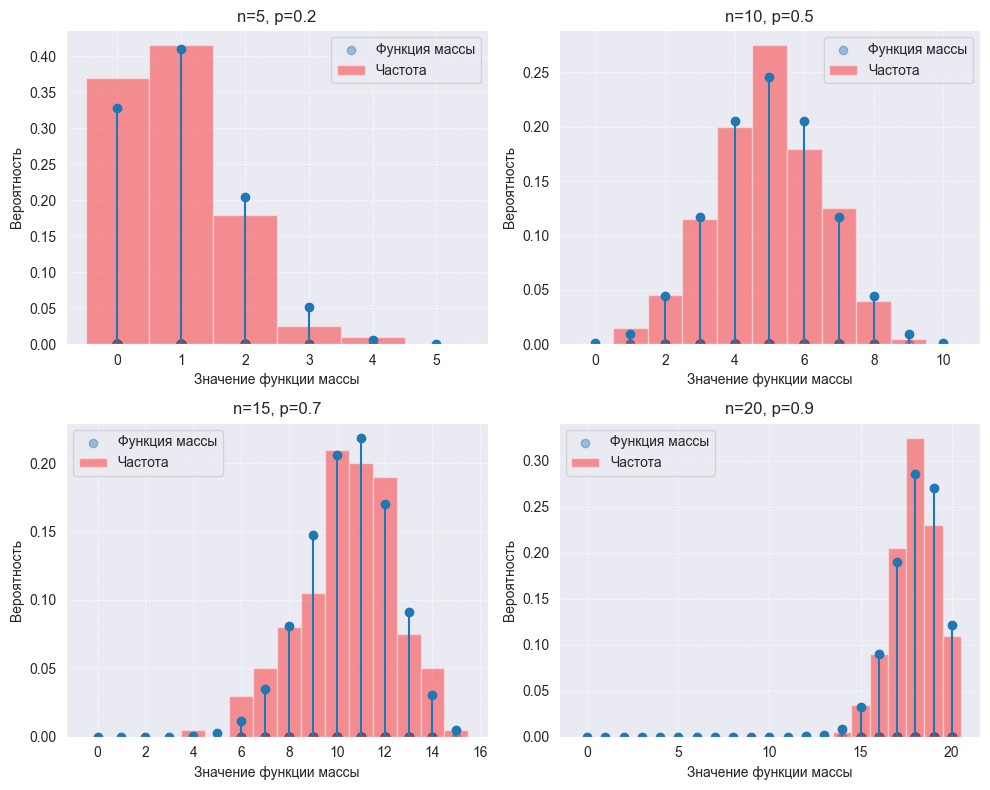

In [21]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

parameters = [(5, 0.2), (10, 0.5), (15, 0.7), (20, 0.9)]

for i, (n, p) in enumerate(parameters):
    sample = sps.binom.rvs(n, p, size=size)

    # Вычисляем индексы для сетки 2x2
    row = i // 2
    col = i % 2

    # Отображаем значения случайных величин
    ax[row, col].scatter(
        sample,
        np.zeros(size),
        alpha=0.4,
        label="Функция массы"
    )

    # Строим дискретную плотность (функцию массы)
    x = np.arange(0, n + 1)
    y = sps.binom.pmf(x, n, p)
    ax[row, col].stem(x, y, linefmt='-', markerfmt='o', basefmt=" ")

    # По точкам строим нормированную полупрозрачную гистограмму
    ax[row, col].hist(
        sample,
        bins=np.arange(-0.5, n + 1.5, 1),
        alpha=0.4,
        color="red",
        label="Частота",
        weights=np.ones_like(sample) / len(sample)
    )

    ax[row, col].legend()
    ax[row, col].grid(ls=':')
    ax[row, col].set_title(f'n={n}, p={p}')
    ax[row, col].set_xlabel('Значение функции массы')
    ax[row, col].set_ylabel('Вероятность')

plt.tight_layout()
plt.show()


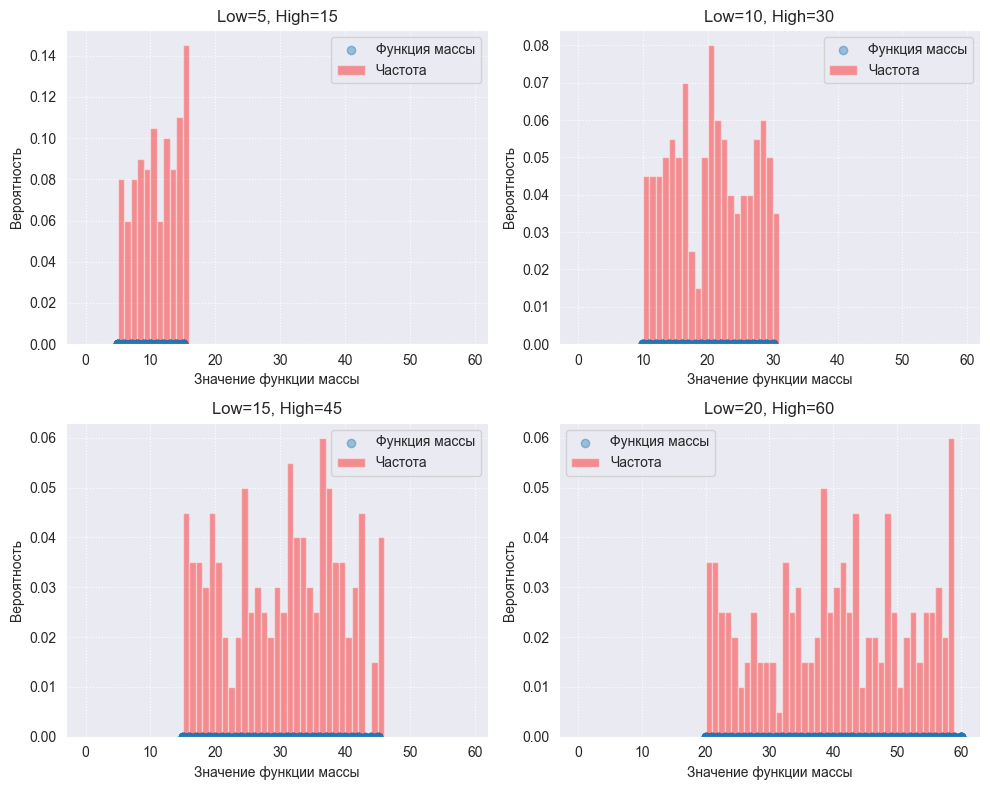

In [22]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

parameters = [(5, 15), (10, 30), (15, 45), (20, 60)]

for i, (low, high) in enumerate(parameters):
    sample = sps.randint.rvs(low, high + 1, size=size)

    # Вычисляем индексы для сетки 2x2
    row = i // 2
    col = i % 2

    # Отображаем значения случайных величин
    ax[row, col].scatter(
        sample,
        np.zeros(size),
        alpha=0.4,
        label="Функция массы"
    )

    # Строим дискретную плотность (функцию массы)
    x = np.arange(low, high + 1)
    y = np.full_like(x, 1 / (high - low + 1))
    ax[row, col].stem(x, y, linefmt='-', markerfmt='o', basefmt=" ")

    # По точкам строим нормированную полупрозрачную гистограмму
    ax[row, col].hist(
        sample,
        bins=np.arange(0, 60, 1),
        alpha=0.4,
        color="red",
        label="Частота",
        weights=np.ones_like(sample) / len(sample)
    )

    ax[row, col].legend()
    ax[row, col].grid(ls=':')
    ax[row, col].set_title(f'Low={low}, High={high}')
    ax[row, col].set_xlabel('Значение функции массы')
    ax[row, col].set_ylabel('Вероятность')

plt.tight_layout()
plt.show()


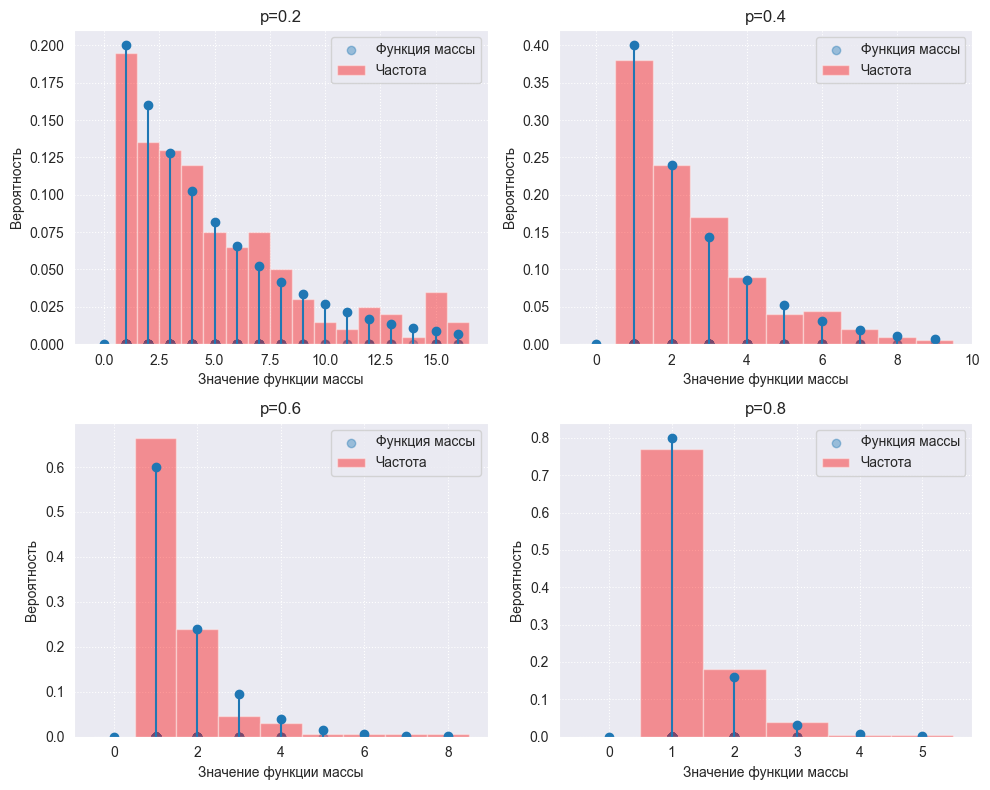

In [23]:
size = 200
grid = np.linspace(-0.25, 20, 500)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

p_values = [0.2, 0.4, 0.6, 0.8]

for i, p in enumerate(p_values):
    sample = sps.geom.rvs(p, size=size)

    # Вычисляем индексы для сетки 2x2
    row = i // 2
    col = i % 2

    # Отображаем значения случайных величин
    ax[row, col].scatter(
        sample,
        np.zeros(size),
        alpha=0.4,
        label="Функция массы"
    )

    # Строим дискретную плотность (функцию массы)
    x = np.arange(0, max(sample) + 1)
    y = sps.geom.pmf(x, p)
    ax[row, col].stem(x, y, linefmt='-', markerfmt='o', basefmt=" ")

    # По точкам строим нормированную полупрозрачную гистограмму
    ax[row, col].hist(
        sample,
        bins=np.arange(-0.5, max(sample) + 1.5, 1),
        alpha=0.4,
        color="red",
        label="Частота",
        weights=np.ones_like(sample) / len(sample)
    )

    ax[row, col].legend()
    ax[row, col].grid(ls=':')
    ax[row, col].set_title(f'p={p}')
    ax[row, col].set_xlabel('Значение функции массы')
    ax[row, col].set_ylabel('Вероятность')

plt.tight_layout()
plt.show()


### Выводы по анализу дискретных распределений

#### 1. Распределение Бернулли:
- **Параметр p (вероятность успеха):** Влияет на вероятность получения значения 1 (успеха). При увеличении p увеличивается вероятность успеха.
- **График дискретной плотности:** Показывает вероятности значений 0 и 1. Чем выше p, тем выше вершина столбца для 1.

#### 2. Распределение Биномиальное:
- **Параметры n и p:** n --- количество испытаний, а p --- вероятность успеха в каждом испытании.
- **График дискретной плотности:** Показывает вероятности различных значений числа успехов в n испытаниях. Увеличение n расширяет распределение.

#### 3. Равномерное дискретное распределение:
- **Параметры low и high (минимальное и максимальное значения):** Определяют интервал, в котором могут находиться значения.
- **График дискретной плотности:** Показывает, что все значения в интервале равновероятны. Ширина столбцов на гистограмме одинакова.

#### 4. Геометрическое распределение:
- **Параметр p:** Вероятность успеха в каждом испытании.
- **График дискретной плотности:** Показывает, что первый успех произойдет в определенном испытании. С уменьшением p увеличивается среднее число испытаний до первого успеха.

### Общие выводы:
- Параметры распределений влияют на форму и характер распределения.
- Гистограммы хорошо соответствуют теоретическим ожиданиям, а их форма становится более "гладкой" с увеличением размера выборки.

# Часть 2 `Pandas`, `Matplotlib`, `Seaborn`

## Задача 1  (2 балла)

Начнем с необходимых приготовлений.

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [25]:
coins = pd.read_csv('coins.csv')

Посмотрим что получилось

In [26]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете?

In [27]:
total_unique_coins = coins['name'].nunique()
total_unique_coins

70

#### 2. За какой период данные мы имеем? 

In [28]:
start_date = coins.date.min()
end_date = coins.date.max()

# Период - 5 лет
start_date, end_date

('2013-04-28', '2018-06-06')

#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? 

In [29]:
missing_data = coins.isna().sum()

# Ниже табличка с количеством пропусков в каждой из колонок. Пропуски - None или np.NaN.
missing_data

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

#### 4. У какой монеты и когда была самая высокая цена? 

In [49]:
max_price_coin = coins.loc[coins.high.idxmax()]['name']
date_mpc = coins.loc[coins.high.idxmax()]['date']
price_mpc = coins.loc[coins.high.idxmax()]['high']

max_price_coin, date_mpc, price_mpc


('Bitcoin', '2017-12-17', 20089.0)

#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. 

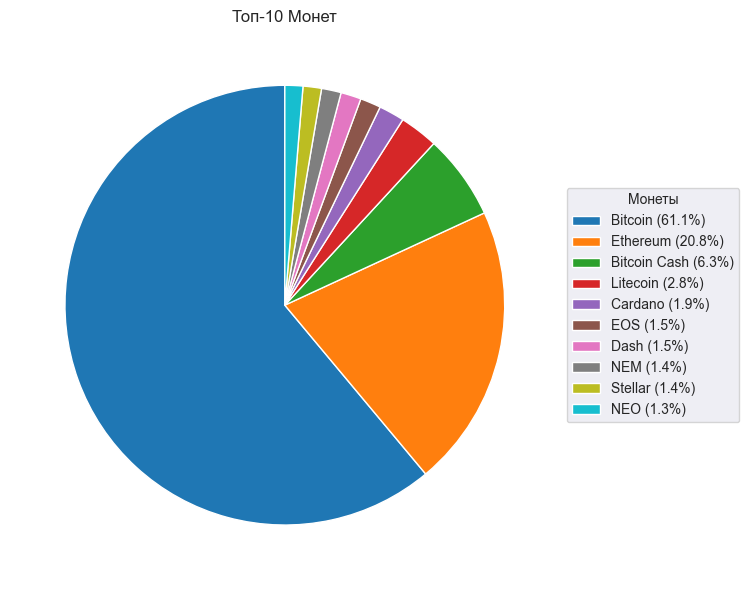

('Bitcoin', 'KingN Coin')

In [31]:
total_market_cap = coins.groupby('name')['market'].sum()

max_cap_coin = total_market_cap.idxmax()
min_cap_coin = total_market_cap.idxmin()

# Топ-10 монет по суммарной капитализации
top_10_coins = total_market_cap.nlargest(10)

plt.figure(figsize=(10, 6))

# Строим круговую диаграмму с долями для топ-10 монет
wedges, _ = plt.pie(top_10_coins, startangle=90)

legend_labels = [f'{label} ({percent:.1%})' for label, percent in
                 zip(top_10_coins.index, top_10_coins / top_10_coins.sum())]
plt.legend(wedges, legend_labels, title="Монеты", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Топ-10 Монет")
plt.tight_layout()
plt.show()

# Bitcoin и KingN Coin
max_cap_coin, min_cap_coin


## 2. Визуализация (2 балла)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [32]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coin_data = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]

    fig, ax = plt.subplots(figsize=(12, 8))

    sns.lineplot(x=coin_data['date'], y=coin_data['close'])
    sns.scatterplot(x=coin_data['date'], y=coin_data['open'], marker='o', color='green')
    sns.scatterplot(x=coin_data['date'], y=coin_data['high'], marker='^', color='blue')
    sns.scatterplot(x=coin_data['date'], y=coin_data['low'], marker='v', color='red')

    ax.set_title(f'График цен для {symbol} ({start_date} по {end_date})')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена (USD)')
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
    

Посмотрим, что получилось:

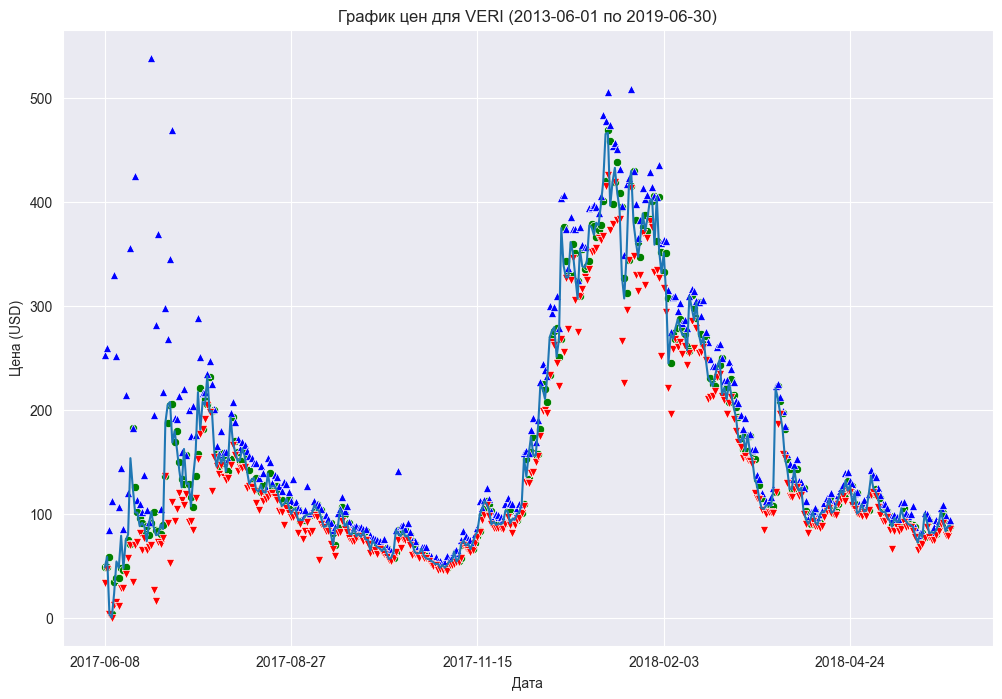

In [33]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (2 балла)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [34]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coin_data = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)].copy()

    coin_data['pnd'] = coin_data['high'] / coin_data[['open', 'close']].max(axis=1)

    # Находим день с максимальным значением pnd
    if not coin_data['pnd'].empty:
        max_pnd_day = coin_data.loc[coin_data['pnd'].idxmax()]

        return max_pnd_day[['name', 'date', 'pnd']]
    else:
        return pd.DataFrame()

In [35]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

name       Bitcoin
date    2017-11-29
pnd       1.142894
Name: 24860, dtype: object

#### Сравните эти значения для разных монет.

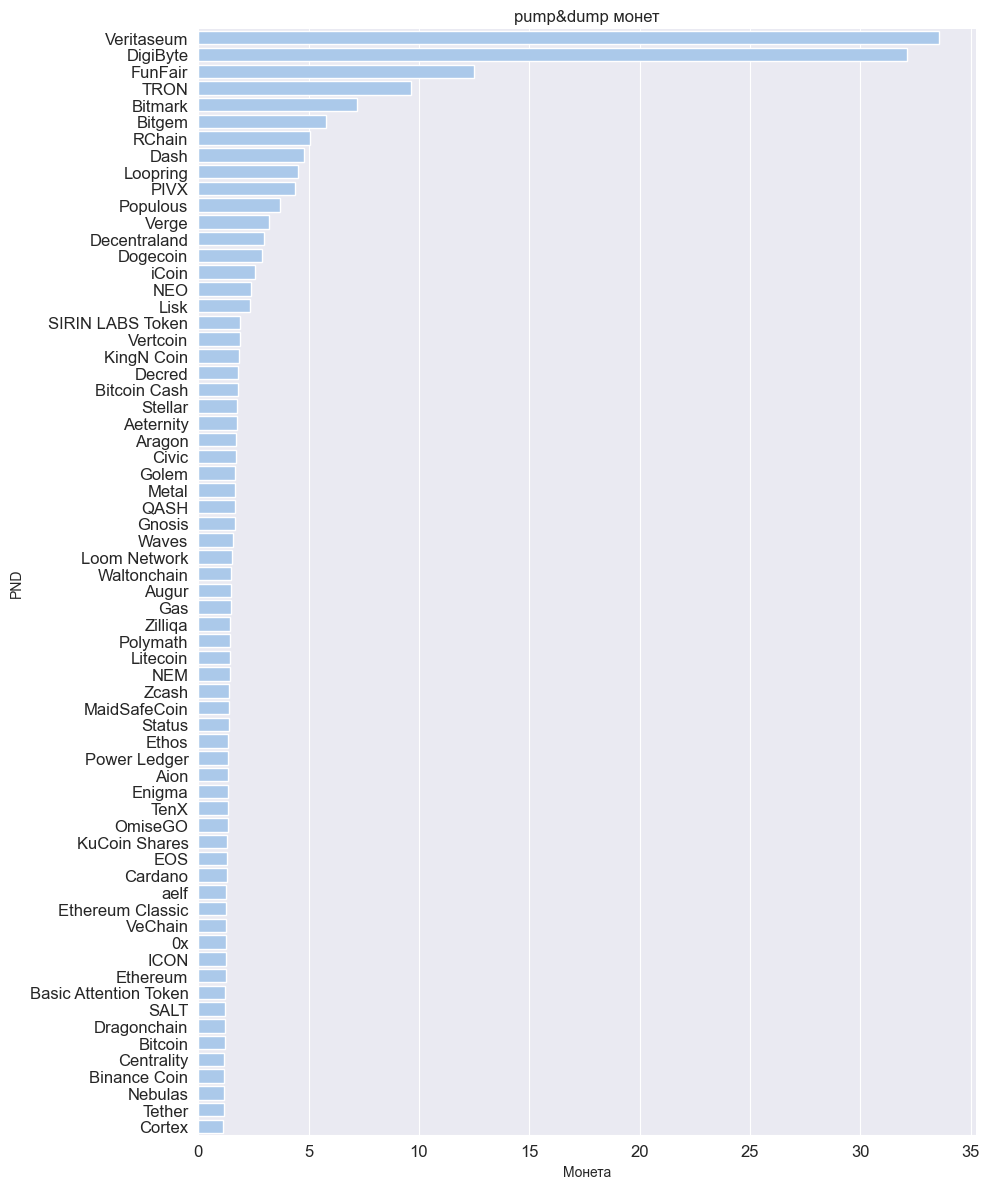

In [36]:
barplot_data = []

for coin in coins['symbol'].unique():
    ms_pnd = find_most_severe_pump_and_dump(coins, coin, start_date='2013-06-01', end_date='2019-06-01')

    if not ms_pnd.empty:
        barplot_data.append(ms_pnd)

barplot_data = pd.DataFrame(barplot_data).nlargest(len(barplot_data), 'pnd')

barplot_data['date'] = pd.to_datetime(barplot_data['date'])

sns.set_palette("pastel")

plt.figure(figsize=(10, 12))
sns.barplot(x='pnd', y='name', data=barplot_data)

plt.title('pump&dump монет')
plt.xlabel('Монета')
plt.ylabel('PND')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()


## 4. Окупаемость инвестиций (2 балла)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [37]:
def compute_roi(coins, investments, start_date, end_date):
    delta = np.sum(
        # Считаем изменение как (P_end/P_start - 1) * amount
        [investments[symbol] * 
         (coins[(coins['symbol'] == symbol) & (coins['date'] == end_date)].close.values[0] /  # Цена на конец периода
          coins[(coins['symbol'] == symbol) & (coins['date'] == start_date)].close.values[0] - 1) # Цена на начало периода 
         for symbol in investments.keys()]
    )
    return delta / np.sum([x for x in investments.values()])

In [38]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.07113395473289516

In [39]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.62772835603723

## 5. Технический анализ (2 балла)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [40]:
def plot_bollinger_bands(coins, symbol, window, width):
    sns.set_palette("pastel")
    
    coin_data = coins[coins['symbol'] == symbol].copy()

    coin_data['MA'] = coin_data['close'].rolling(window=window).mean()
    coin_data['std'] = coin_data['close'].rolling(window=window).std()

    coin_data['upper_band'] = coin_data['MA'] + width * coin_data['std']
    coin_data['lower_band'] = coin_data['MA'] - width * coin_data['std']

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=coin_data['date'], y=coin_data['close'], label='Цена', linewidth=1)
    sns.lineplot(x=coin_data['date'], y=coin_data['MA'], label=f'Скользящее среднее ({window} дней)', linewidth=2)
    sns.lineplot(x=coin_data['date'], y=coin_data['upper_band'], label=f'Верхняя граница Боллинджера', linestyle='--', color='red', linewidth=1)
    sns.lineplot(x=coin_data['date'], y=coin_data['lower_band'], label=f'Нижняя граница Боллинджера', linestyle='--', color='green', linewidth=1)

    plt.title(f'График цены и Боллинджеровских полос для {symbol}')
    plt.xlabel('Дата')
    plt.ylabel('Цена (USD)')
    plt.legend(loc='best')
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=6))

    plt.show()

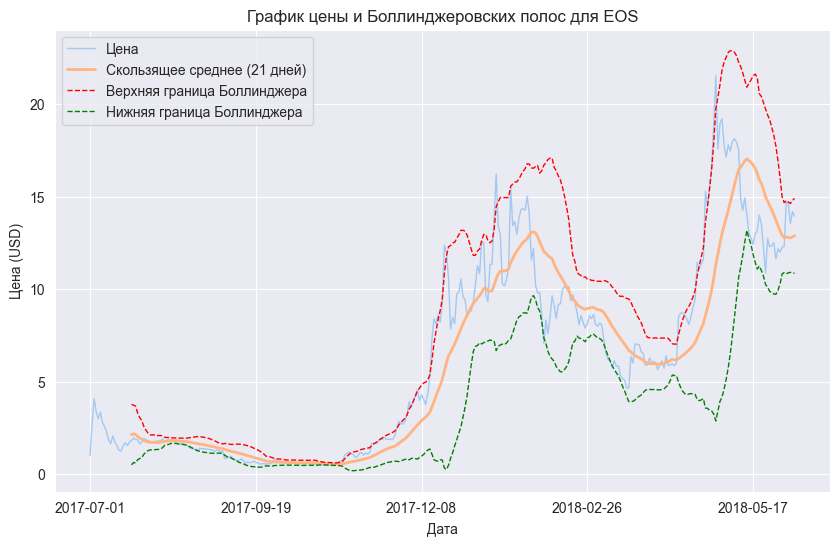

In [41]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Из графика видно, что правило Боллинджера иногда выполняется, а иногда нет. В некоторых случаях график отскакивает от границ Боллинджера, в других --- пробивает, а иногда просто следует по границе. 

## 6. Капитализация как индикатор (3 балла)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [42]:
def plot_coins_capitalizations(coins, symbols, start_date):
    selected_coins = coins[(coins['symbol'].isin(symbols)) & (coins['date'] >= start_date)]
    total_market_cap = selected_coins.groupby('date')['market'].sum()
    
    fig, axs = plt.subplots(2, 1, figsize=(12, 12)) 

    for symbol in symbols:
        coin_data = selected_coins[selected_coins['symbol'] == symbol]
        
        axs[0].plot(coin_data['date'], coin_data['market'], label=f'{symbol} - Total Cap')

        market_share = [coin_cap[1] / total_market_cap[coin_cap[0]] for coin_cap in coin_data[['date', 'market']].values]
        axs[1].plot(coin_data['date'], market_share, label=f'{symbol} - Market Share')

    axs[0].set_title('Капитализация')
    axs[0].set_xlabel('Дата')
    axs[0].set_ylabel('Общая капитализация рынка (USD)')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
    

    axs[1].set_title('Доли капитализаций')
    axs[1].set_xlabel('Дата')
    axs[1].set_ylabel('Доля рынка (%)')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
    

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

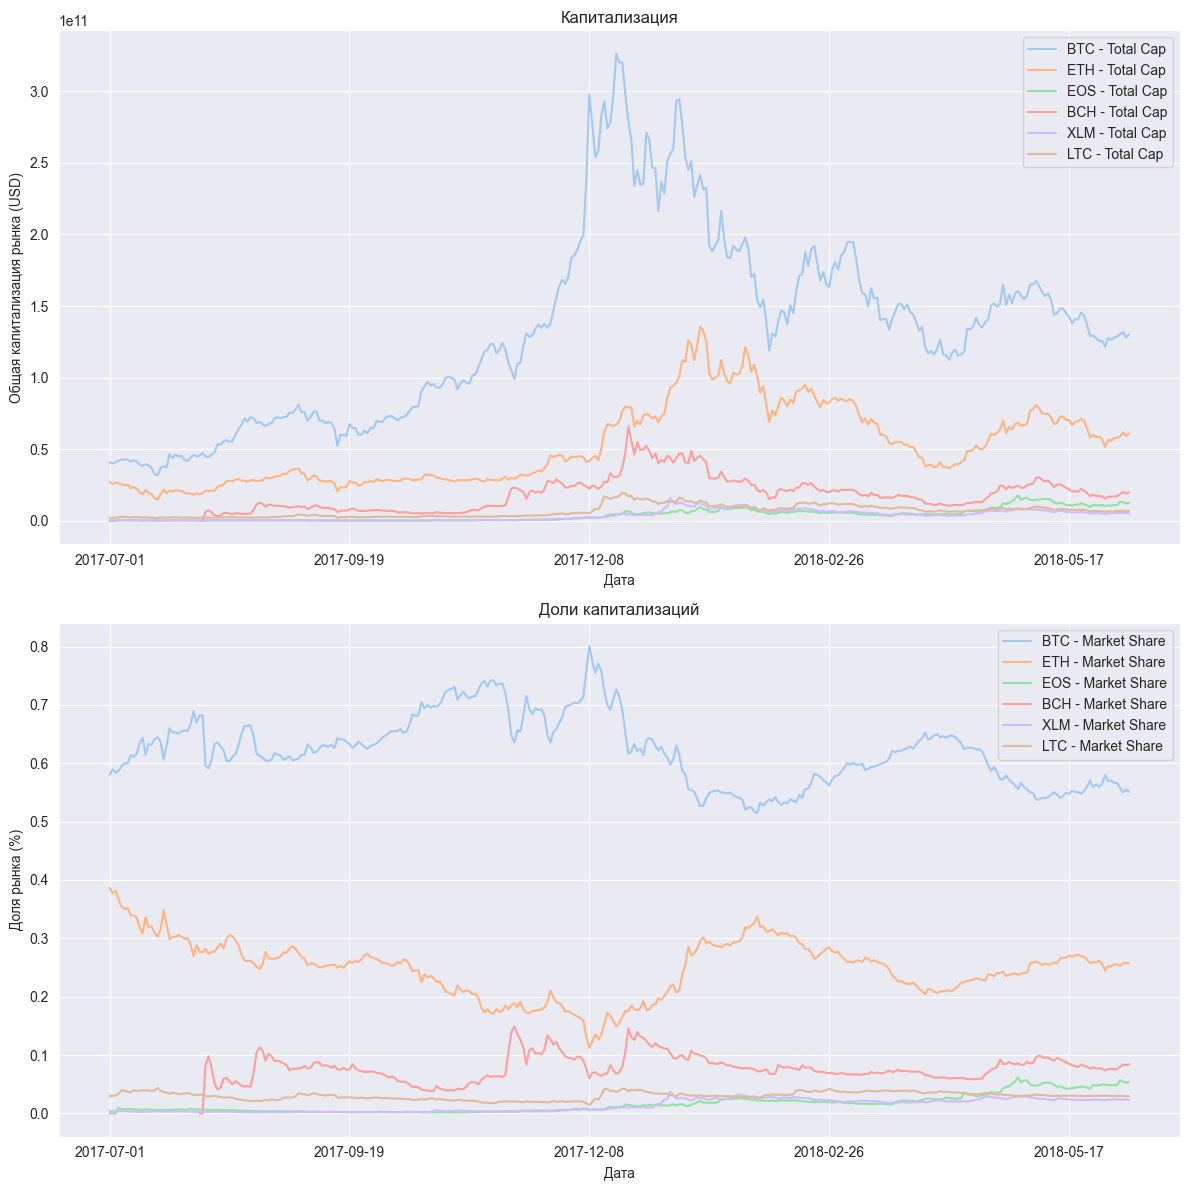

In [43]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Доли капитализации альткойнов растут при падении доли капитализации биткоина и наоборот. Биткойн является основным индикатором общего состояния криптовалютного рынка, а как следствие его неустойчивость показывает неустойчивость всего рынка. Альткоины как-бы ходят за биткойном, но из-за низкой волатильности создают смещение долей своей капитализации, что и приводит к такому поведению.

## 7. Корреляции монет (3 балла)

#### Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [44]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Выбираем данные для рассматриваемых монет и до заданной даты
    selected_coins = coins[(coins['symbol'].isin(symbols)) & (coins['date'] <= date)].copy()
    selected_coins['date'] = pd.to_datetime(selected_coins['date'])
    
    total_market_cap = selected_coins.groupby('date')['market'].sum()

    smoothed_caps = pd.DataFrame()

    # Вычисляем средние доли капитализации сглаженные за последние window дней
    for symbol in symbols:
        coin_data = selected_coins[selected_coins['symbol'] == symbol].copy()
        coin_data.set_index('date', inplace = True)
        coin_data['smoothed_cap'] = coin_data['market'].ewm(alpha=alpha).mean().shift()
        
        smoothed_caps[symbol] = coin_data['smoothed_cap']

    # Вычисляем корреляции между столбцами DataFrame
    correlations = smoothed_caps.corr()
    return correlations


In [45]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)

# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.format(precision=2).background_gradient(cmap='coolwarm')

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.94,0.56,0.95,0.86,0.98,0.75
ETH,0.94,1.00,0.74,0.81,0.94,0.96,0.94
EOS,0.56,0.74,1.00,0.55,0.85,0.68,0.55
BCH,0.95,0.81,0.55,1.00,0.74,0.89,0.83
XLM,0.86,0.94,0.85,0.74,1.00,0.92,0.91
LTC,0.98,0.96,0.68,0.89,0.92,1.00,0.85
ADA,0.75,0.94,0.55,0.83,0.91,0.85,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [46]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.format(precision=2).background_gradient(cmap='coolwarm')

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.92,0.90,0.94,0.92,0.96,0.89
ETH,0.92,1.00,0.92,0.95,0.79,0.92,0.96
EOS,0.90,0.92,1.00,0.91,0.98,0.97,0.98
BCH,0.94,0.95,0.91,1.00,0.91,0.87,0.85
XLM,0.92,0.79,0.98,0.91,1.00,0.95,0.98
LTC,0.96,0.92,0.97,0.87,0.95,1.00,0.98
ADA,0.89,0.96,0.98,0.85,0.98,0.98,1.00
